In [1]:
import pandas as pd
import numpy as np

In [2]:
es = pd.read_csv('precomputed_sims/ES_CUDA.csv', delimiter=",", header=None, index_col=None)
es.columns = 0.5 * np.arange(1, 10)

es[0] = 2350.0

es = es[0.5 * np.arange(10)]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

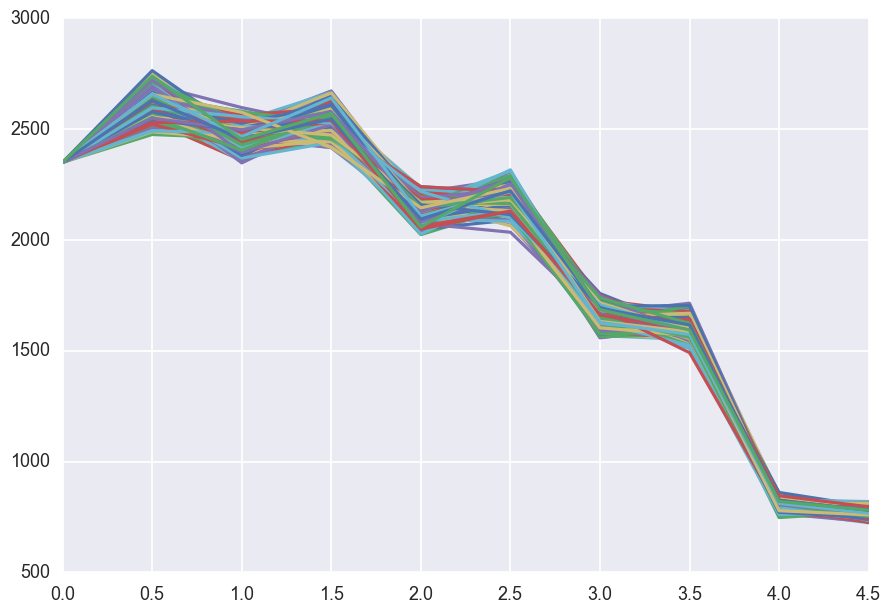

In [4]:
es = es.T

for path in es:
    plt.plot(es[path])
    
plt.show()

In [5]:
mean = es.mean(axis=1)
q_up = es.quantile(q=0.99, axis=1)
q_down = es.quantile(q=0.01, axis=1)

In [30]:
#mean.name = r'$\mathbb{ES}^{\#} \mathrm{Mean}$'
mean.name = r'$\rm{\mathbb{ES}}^{\sharp} \rm{ Mean}$'
q_up.name = r'$\rm{\mathbb{ES}}^{\sharp} 99\%$'
q_down.name = r'$\rm{\mathbb{ES}}^{\sharp} 1 \%$'

In [31]:
from matplotlib.ticker import FuncFormatter

formatter_tex_bps = FuncFormatter(lambda y, pos: "$%.0f$" % y)

def formatter_tex_time(x, pos):
    if x == 0.:
        return r'$\rm{0 \, y}$'
    
    str_x = str(x)
    
    if str_x[-1] == '0':
        return r'$\rm{%s \, y}$' % (str_x[:-2])

    return r'$\rm{%s \, y}$' % (str_x)

formatter_tex_time = FuncFormatter(formatter_tex_time)

labelsize = 18
titlesize = 20

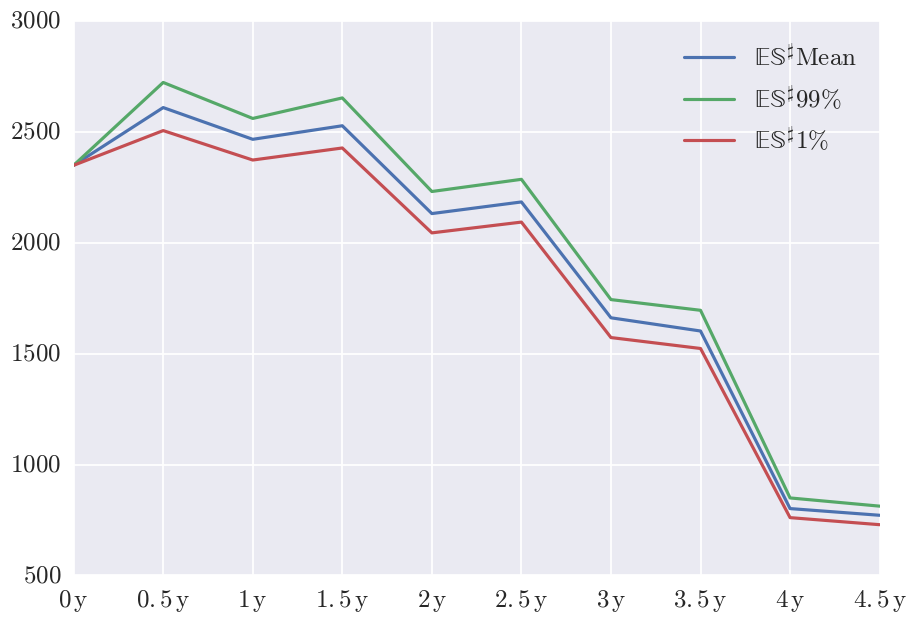

In [32]:
mean.plot()
q_up.plot()
q_down.plot()

plt.gca().xaxis.set_major_formatter(formatter_tex_time)
plt.gca().yaxis.set_major_formatter(formatter_tex_bps)

plt.legend(fontsize=labelsize)
plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()